In [1]:
import jpype
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from jpype.types import JInt, JArray, JString
from typing import List, Tuple
from itertools import combinations



In [2]:
jpype.startJVM(classpath=[".."])

Permutation = jpype.JClass("utils.permutation_algoritms.Permutation")

In [3]:
# создание массива из кортежей с 1, 2, 3 и до 12 элементов
elements = list(range(1, 552, 50))
tuples_list = [tuple(elements[:r]) for r in range(2, 9)]

test_write_list = tuples_list[1]

tuples_list

[(1, 51),
 (1, 51, 101),
 (1, 51, 101, 151),
 (1, 51, 101, 151, 201),
 (1, 51, 101, 151, 201, 251),
 (1, 51, 101, 151, 201, 251, 301),
 (1, 51, 101, 151, 201, 251, 301, 351)]

# Оценка алгоритмов

In [4]:
def test_result() -> Tuple[List]:
    narayana_result = []
    johnson_trotten_result = []
    inversion_vector_result = []

    for item in tuples_list:
        str_list = list(map(str, item))
        java_array = JArray(JString)(str_list)

        narayana = Permutation.runPermutationMethod('narayana', java_array, None)
        narayana_result.append(narayana.getTime())

        johnson_trotten = Permutation.runPermutationMethod('johnson-trotter', java_array, None)
        johnson_trotten_result.append(johnson_trotten.getTime())

        inversion_vector = Permutation.runPermutationMethod('inversion-vector', java_array, None)
        inversion_vector_result.append(inversion_vector.getTime())

    
    return narayana_result, johnson_trotten_result, inversion_vector_result

In [5]:
narayana_result, johnson_trotten_result, inversion_vector_result = test_result()

In [6]:
results_dataframe = pd.DataFrame({'Метод Нарайаны': narayana_result,
                   'Метод Джонсона-Троттере': johnson_trotten_result,
                   'Метод Вектора инверсий': inversion_vector_result})
results_dataframe.index = range(2, 2 + len(results_dataframe))

results_dataframe

,Метод Нарайаны,Метод Джонсона-Троттере,Метод Вектора инверсий
2,0.1698,0.0079,0.0168
3,0.0080,0.0056,0.0099
4,0.0252,0.0196,0.0402
5,0.1330,0.1101,0.2267
6,0.5102,0.5490,0.5078
7,1.6821,3.0998,1.8701
8,8.5854,10.2463,8.0361


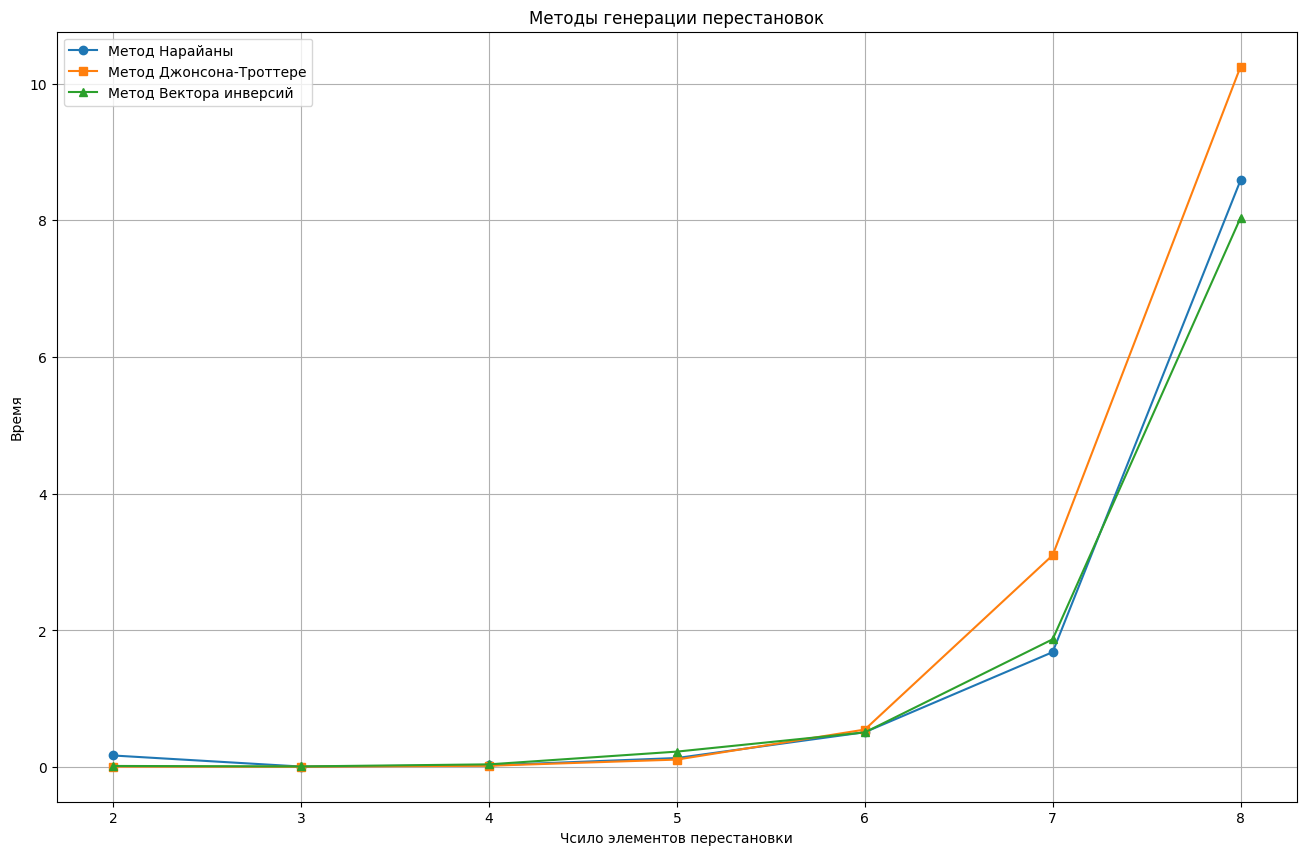

In [7]:
plt.figure(figsize=(16, 10))

subset = results_dataframe.iloc[:7]
plt.plot(subset.index, subset['Метод Нарайаны'], label='Метод Нарайаны', marker='o')
plt.plot(subset.index, subset['Метод Джонсона-Троттере'], label='Метод Джонсона-Троттере', marker='s')
plt.plot(subset.index, subset['Метод Вектора инверсий'], label='Метод Вектора инверсий', marker='^')

plt.xlabel('Чсило элементов перестановки')
plt.ylabel('Время')
plt.title('Методы генерации перестановок')
plt.legend()
plt.grid()

plt.show()


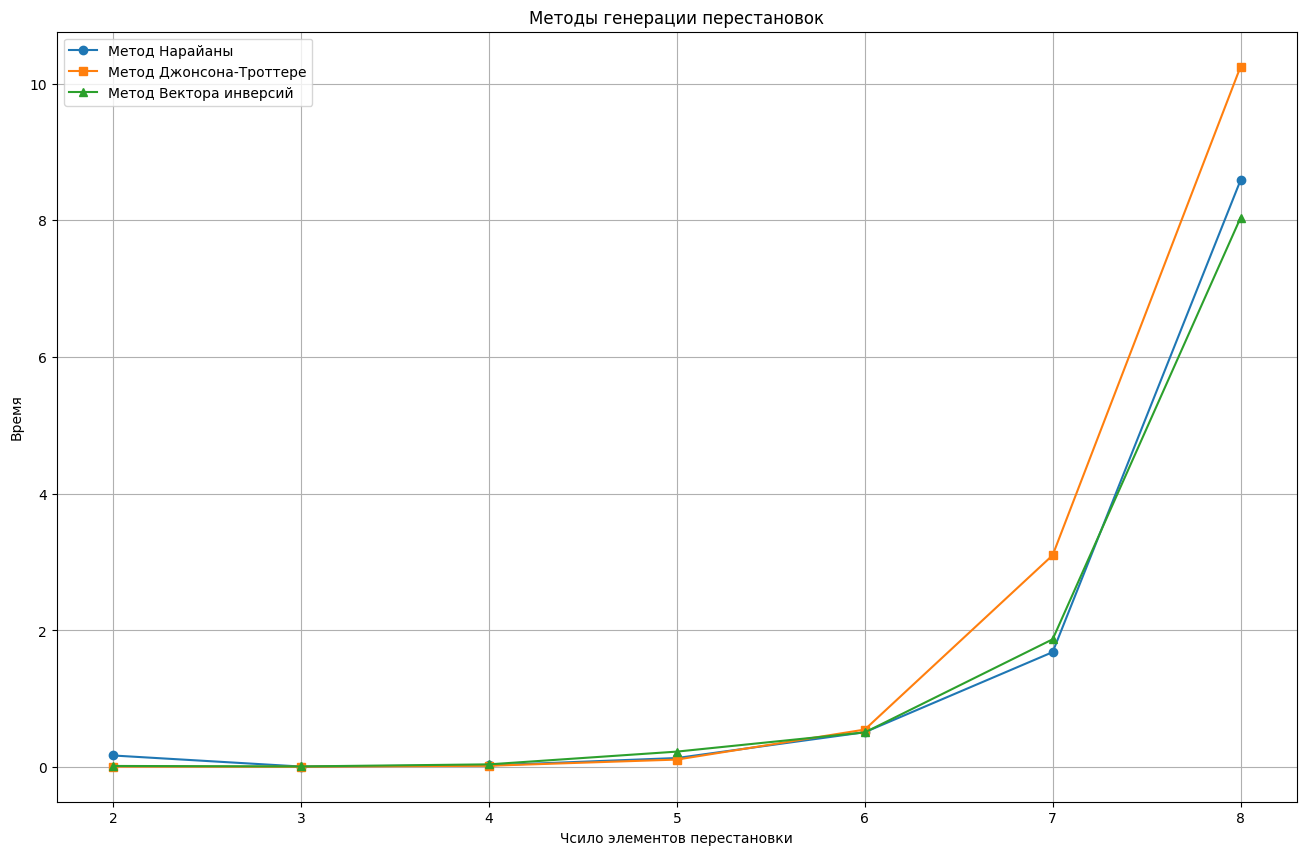

In [8]:
plt.figure(figsize=(16, 10))

subset = results_dataframe.iloc[:11]
plt.plot(subset.index, subset['Метод Нарайаны'], label='Метод Нарайаны', marker='o')
plt.plot(subset.index, subset['Метод Джонсона-Троттере'], label='Метод Джонсона-Троттере', marker='s')
plt.plot(subset.index, subset['Метод Вектора инверсий'], label='Метод Вектора инверсий', marker='^')

plt.xlabel('Чсило элементов перестановки')
plt.ylabel('Время')
plt.title('Методы генерации перестановок')
plt.legend()
plt.grid()

plt.show()

Сложность алгоритма Нарайаны по времени O(n * n!):
Сложность алгоритма Нарайаны по памяти O(n):
Сложность алгоритма Джонсона-Троттере по времени O(n * n!):
Сложность алгоритма Джонсона-Троттере по памяти O(n):
Сложность алгоритма Вектора инверсий по времени O(n^2 * n!):
Сложность алгоритма Вектора инверсий по памяти O(n):

# генерация перестановок

In [9]:
java_array = JArray(JString)(['1', '2', '3', '4'])

def printer(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            print(line, end="")

In [10]:
narayana = Permutation.runPermutationMethod('narayana', java_array, 'narayana_method.txt')

print(narayana.toString())
printer('narayana_method.txt')

Elapsed time: 0.5187 ms
[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 3, 2, 4]
[1, 3, 4, 2]
[1, 4, 2, 3]
[1, 4, 3, 2]
[2, 1, 3, 4]
[2, 1, 4, 3]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 1, 3]
[2, 4, 3, 1]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 2, 1, 4]
[3, 2, 4, 1]
[3, 4, 1, 2]
[3, 4, 2, 1]
[4, 1, 2, 3]
[4, 1, 3, 2]
[4, 2, 1, 3]
[4, 2, 3, 1]
[4, 3, 1, 2]
[4, 3, 2, 1]


In [11]:
johnson_trotten = Permutation.runPermutationMethod('johnson-trotter', java_array, 'johnson-trotter_method.txt')

print(johnson_trotten.toString())
printer('johnson-trotter_method.txt')

Elapsed time: 0.2592 ms
[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 4, 2, 3]
[4, 1, 2, 3]
[4, 1, 3, 2]
[1, 4, 3, 2]
[1, 3, 4, 2]
[1, 3, 2, 4]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 4, 1, 2]
[4, 3, 1, 2]
[4, 3, 2, 1]
[3, 4, 2, 1]
[3, 2, 4, 1]
[3, 2, 1, 4]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 3, 1]
[4, 2, 3, 1]
[4, 2, 1, 3]
[2, 4, 1, 3]
[2, 1, 4, 3]
[2, 1, 3, 4]


In [12]:
inversion_vector = Permutation.runPermutationMethod('inversion-vector', java_array, 'inversion-vector')

print(inversion_vector.toString())
printer('inversion-vector')

Elapsed time: 0.2176 ms
[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 3, 2, 4]
[1, 3, 4, 2]
[1, 4, 2, 3]
[1, 4, 3, 2]
[2, 1, 3, 4]
[2, 1, 4, 3]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 1, 3]
[2, 4, 3, 1]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 2, 1, 4]
[3, 2, 4, 1]
[3, 4, 1, 2]
[3, 4, 2, 1]
[4, 1, 2, 3]
[4, 1, 3, 2]
[4, 2, 1, 3]
[4, 2, 3, 1]
[4, 3, 1, 2]
[4, 3, 2, 1]


# перестановки n элементов из множества

In [13]:
import ast

def read_file_as_list(file_path):
    result = []
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            result.append(ast.literal_eval(line.strip()))  # Преобразуем строку в список
    return result

file_path = "inversion-vector"
data = read_file_as_list(file_path)
print(data)

[[1, 2, 3, 4], [1, 2, 4, 3], [1, 3, 2, 4], [1, 3, 4, 2], [1, 4, 2, 3], [1, 4, 3, 2], [2, 1, 3, 4], [2, 1, 4, 3], [2, 3, 1, 4], [2, 3, 4, 1], [2, 4, 1, 3], [2, 4, 3, 1], [3, 1, 2, 4], [3, 1, 4, 2], [3, 2, 1, 4], [3, 2, 4, 1], [3, 4, 1, 2], [3, 4, 2, 1], [4, 1, 2, 3], [4, 1, 3, 2], [4, 2, 1, 3], [4, 2, 3, 1], [4, 3, 1, 2], [4, 3, 2, 1]]


In [14]:
def generate_all_combinations_permutations(elements: List[str], method: str) -> List[List[str]]:
    """Генерирует все возможные выборки (1..n элементов) и их перестановки."""
    all_results = []
    n = len(elements)

    for r in range(1, n + 1):  # Размер выборки от 1 до n
        for combo in combinations(elements, r):  # Генерация всех выборок длины r
            j_array = JArray(JString)(combo)

            Permutation.runPermutationMethod(method, j_array, 'generate_all_combinations_permutations_bufer.txt')

            perms = read_file_as_list('generate_all_combinations_permutations_bufer.txt')

            all_results.extend(perms)  # Добавляем все перестановки в общий список

    return all_results

In [15]:
from time import time

def generate_all_combinations_permutations_results(method: str):
    elements = ['стол', 'стул', 'шкаф']

    start_time = time()
    comb = generate_all_combinations_permutations(elements, method)
    end_time = time()

    print(f'Время выполнения: {end_time-start_time}')
    for c in comb:
        print(c)


In [16]:
generate_all_combinations_permutations_results('narayana')

ValueError: malformed node or string on line 1: <ast.Name object at 0x0000016B7AD8FDD0>

In [ ]:
#jpype.shutdownJVM()